In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(CSOmapR)
    library(scater)
    library(logger)
    library(ComplexHeatmap)
    library(ggraph)
    library(tidygraph)

})

In [4]:
######################
# Smartseq2 CD45 All
######################
sce <- readRDS("../../data/expression/sce/sce_Smartseq2_scHCC-CD45_featureCounts_qc_clustered_analysed.rds")
assay(sce, "tpm") <- calculateTPM(sce, rowData(sce)$Length)
tpmdata <- tpm(sce)
tpmdata <- as.data.frame(as.matrix(tpmdata))


#####
#perform CSOmap

log_info("CSOmap started ...")
TPM <- tpmdata
LR <- read.table('/raid1/zhangqiming/01Project_HCC/02Analysis/CSOmap/CSOmap.R/data/demo/LR_pairs.txt',
                 header = F)
colnames(LR) <- c('lignad','receptor','weight')
LR[,1:2] <- sapply(LR[,1:2], as.character)

# Perturbate HGF

In [5]:
coords_outdir = "./out/CSOmapR/coordinates_20210610_pertubateHGF_in_CAF.txt"
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName

Rows: 9017 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [6]:
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]

In [9]:
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
saveRDS(signif_results, file = "./out/CAF_perturbHGF_CSOmap.rds")

[2021-10-12 15:19:11] identify topK
[2021-10-12 15:19:14] calculate detailed connections
[2021-10-12 15:19:18] calculate pvalues


# Perturbating TGFB1

In [13]:
coords_outdir = "./out/CSOmapR/coordinates_20210610_pertubateTGFB1_in_CAF.txt"
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName

Rows: 9017 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [14]:
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]

In [15]:
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
saveRDS(signif_results, file = "./out/CAF_perturbTGFB1_CSOmap.rds")

[2021-10-12 15:27:58] identify topK
[2021-10-12 15:28:01] calculate detailed connections
[2021-10-12 15:28:05] calculate pvalues


# Pertubating FGA

In [16]:
coords_outdir = "./out/CSOmapR/coordinates_20210610_pertubateFGA_in_CAF.txt"
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
saveRDS(signif_results, file = "./out/CAF_perturbFGA_CSOmap.rds")

Rows: 9017 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[2021-10-12 15:33:15] identify topK
[2021-10-12 15:33:17] calculate detailed connections
[2021-10-12 15:33:21] calculate pvalues


# Pertubating FGB

In [18]:
coords_outdir = "./out/CSOmapR/coordinates_20210610_pertubateFGB_in_CAF.txt"
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
saveRDS(signif_results, file = "./out/CAF_perturbFGB_CSOmap.rds")

Rows: 9017 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[2021-10-12 15:33:42] identify topK
[2021-10-12 15:33:45] calculate detailed connections
[2021-10-12 15:33:49] calculate pvalues


# Pertubating FGG

In [19]:
coords_outdir = "./out/CSOmapR/coordinates_20210610_pertubateFGG_in_CAF.txt"
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
saveRDS(signif_results, file = "./out/CAF_perturbFGG_CSOmap.rds")

Rows: 9017 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[2021-10-12 15:34:12] identify topK
[2021-10-12 15:34:15] calculate detailed connections
[2021-10-12 15:34:18] calculate pvalues


# Pertubating 

In [20]:
coords_outdir = "./out/CSOmapR/coordinates_20210610_pertubateHLA-B_in_CAF.txt"
coords <- as.data.frame(readr::read_tsv(coords_outdir))
rownames(coords) <- coords$cellName
df <- cbind(as.data.frame(coords[colnames(sce), ] ), celltype = sce$leiden_global_celltype, tissue = sce$tissue)
df <- df[!is.na(df$x),]
cell_count_df <- df %>% group_by(celltype) %>% summarise(count = n())
df_tumor <- df[df$tissue %in% c("Tumor", "TumorCore"),]
# Remove blood enriched celltype
df_tumor <- df_tumor[!(df_tumor$celltype %in% c( 'ILCs', 'CD14+ Monocytes', 'CD16+ Monocytes', 'Blood CD16+ NK', 'B Cell')),]
signif_results = getSignificance(as.matrix(df_tumor[,c('x', 'y', 'z')]), labels = df_tumor$celltype, k = 3,verbose = T)
saveRDS(signif_results, file = "./out/CAF_perturbHLAB_CSOmap.rds")

Rows: 9017 Columns: 4

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): cellName
dbl (3): x, y, z


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[2021-10-12 15:35:06] identify topK
[2021-10-12 15:35:09] calculate detailed connections
[2021-10-12 15:35:13] calculate pvalues


# Visualization

In [21]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(CSOmapR)
    library(scater)
    library(logger)
    library(ComplexHeatmap)
    library(ggraph)
    library(tidygraph)

})

In [22]:
csomap_all <- readr::read_rds("./out/signif_results_CSOmap.rds")
csomap_timp1 <- readr::read_rds("./out/CAF_pertubeTIMP1_CSOmap.rds")
csomap_tgf <- readr::read_rds("./out/CAF_perturbTGFB1_CSOmap.rds")
csomap_hgf <- readr::read_rds("./out/CAF_perturbHGF_CSOmap.rds")
csomap_hla <- readr::read_rds("./out/CAF_perturbHLAB_CSOmap.rds")
csomap_fga <- readr::read_rds("./out/CAF_perturbFGA_CSOmap.rds")
csomap_fgg <- readr::read_rds("./out/CAF_perturbFGG_CSOmap.rds")
csomap_fgb <- readr::read_rds("./out/CAF_perturbFGB_CSOmap.rds")

In [31]:
plotDF <- bind_rows(
        reshape2::melt(csomap_timp1$qvalue) %>% filter(Var1 == "Hepatocytes")  %>% mutate(group = "PertTIMP1"),
        reshape2::melt(csomap_all$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "Original"), 
        reshape2::melt(csomap_hgf$qvalue) %>% filter(Var1 == "Hepatocytes")  %>% mutate(group = "PertHGF"),
        reshape2::melt(csomap_hla$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "PertHLA"),
        reshape2::melt(csomap_tgf$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "PertTGFB1"),
        reshape2::melt(csomap_fga$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "PertFGA"),
        reshape2::melt(csomap_fgb$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "PertFGB"),
        reshape2::melt(csomap_fgg$qvalue) %>% filter(Var1 == "Hepatocytes") %>% mutate(group = "PertFGG")
) %>% mutate(group = factor(group, levels = c("Original", "PertTIMP1", "PertHGF", "PertTGFB1", "PertHLA", "PertFGA", "PertFGB", "PertFGG")))


In [36]:
RColorBrewer::brewer.pal(name = 'Reds',n = 9)

[1] "#FFF5F0" "#FEE0D2" "#FCBBA1" "#FC9272" "#FB6A4A" "#EF3B2C" "#CB181D"
[8] "#A50F15" "#67000D"

In [57]:
ggpubr::theme_pubr

function (base_size = 12, base_family = "", border = FALSE, margin = TRUE, 
    legend = c("top", "bottom", "left", "right", "none"), x.text.angle = 0) 
{
    half_line <- base_size/2
    if (!is.numeric(legend)) 
        legend <- match.arg(legend)
    if (x.text.angle > 5) 
        xhjust <- 1
    else xhjust <- NULL
    if (border) {
        panel.border <- element_rect(fill = NA, colour = "black", 
            size = 0.7)
        axis.line <- element_blank()
    }
    else {
        panel.border <- element_blank()
        axis.line = element_line(colour = "black", size = 0.5)
    }
    if (margin) 
        plot.margin <- margin(half_line, half_line, half_line, 
            half_line)
    else plot.margin <- unit(c(0.5, 0.3, 0.3, 0.3), "mm")
    .theme <- theme_bw(base_size = base_size, base_family = base_family) %+replace% 
        theme(panel.border = panel.border, panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), axis.line = axis.line, 
            axis.text = element_text(color = "black"), legend.key = element_blank(), 
            strip.background = element_rect(fill = "#F2F2F2", 
                colour = "black", size = 0.7), plot.margin = plot.margin, 
            legend.position = legend, complete = TRUE)
    if (x.text.angle != 0) 
        .theme <- .theme + theme(axis.text.x = element_text(angle = x.text.angle, 
            hjust = xhjust))
    .theme
}
<bytecode: 0x557c38019630>
<environment: namespace:ggpubr>

Saving 6.67 x 6.67 in image



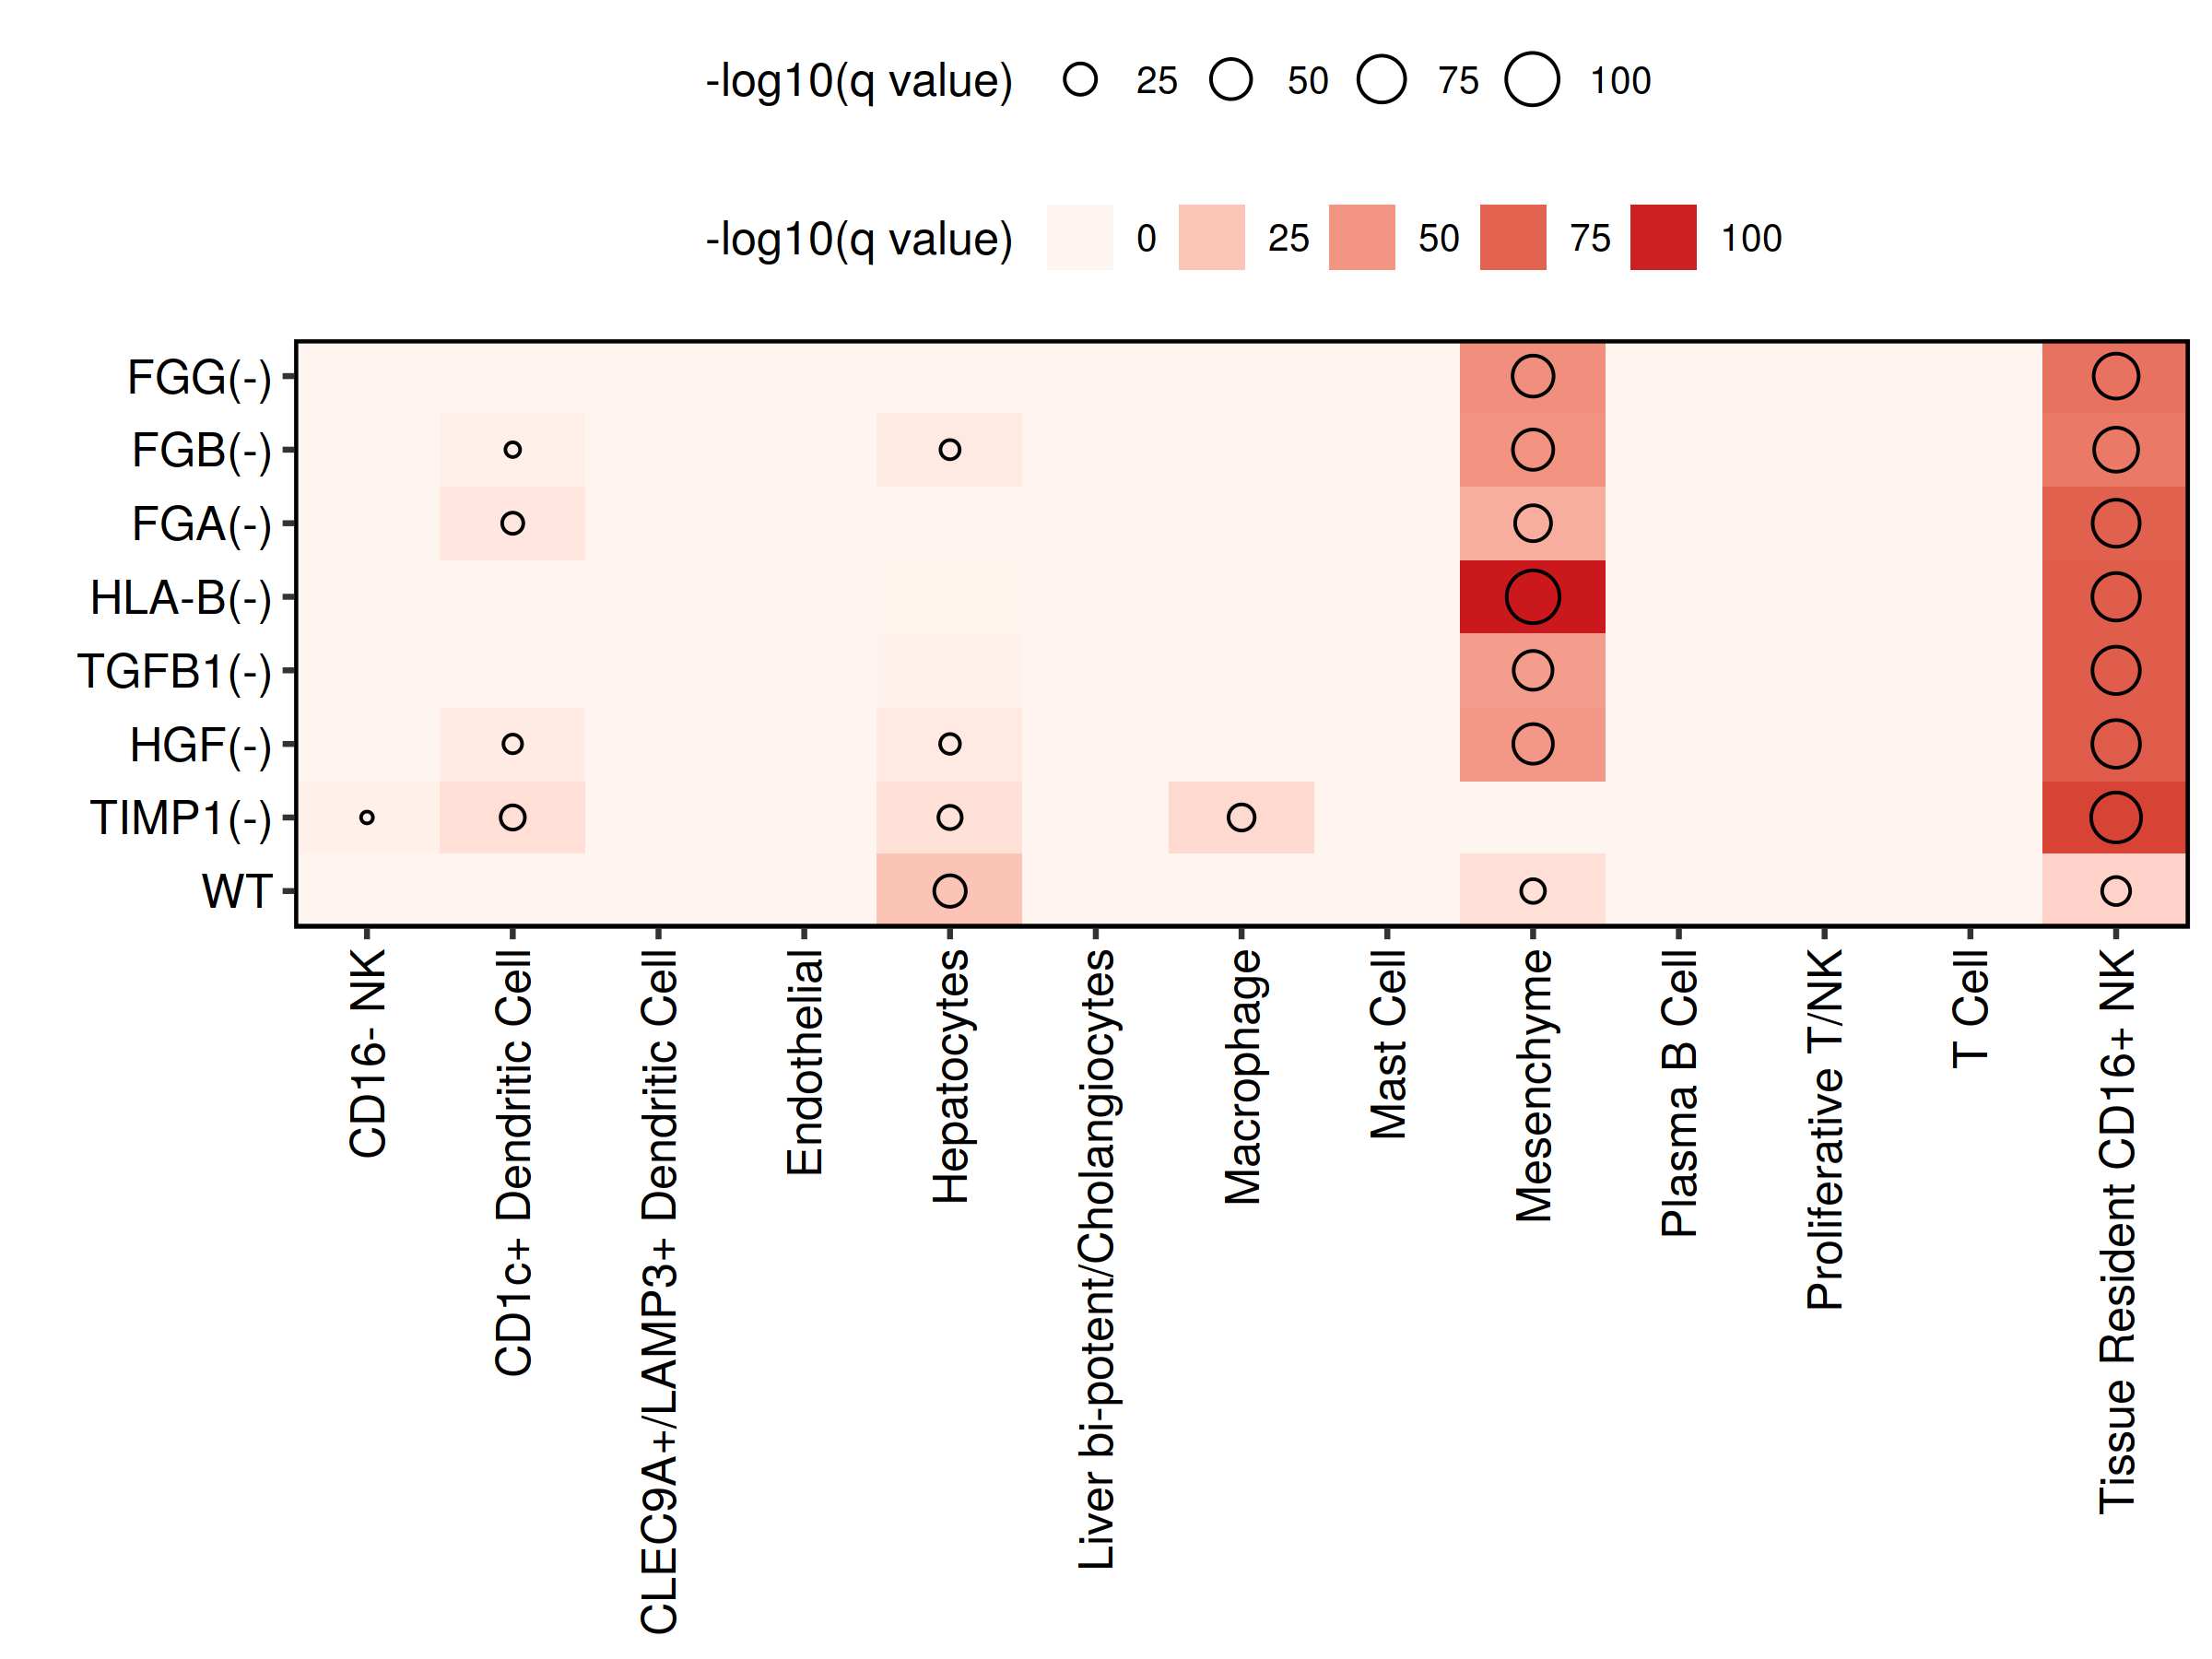

In [72]:
p <- ggplot(plotDF, aes(y = group, x = Var2)) + 
    geom_tile(aes(fill = -log10(value))) +
    geom_point(data = plotDF %>% filter(value < 0.01), fill = NA, aes(size = -log10(value)), shape = 21) +
    scale_fill_gradient2(low = 'white', mid = '#FFF5F0', high = '#CB181D', expand = c(0,0) ) + ylab("")  +
    scale_y_discrete(label = c('WT', 'TIMP1(-)',  'HGF(-)', 'TGFB1(-)', 'HLA-B(-)', 'FGA(-)', 'FGB(-)', 'FGG(-)' ), expand = c(0, 0))  +
    scale_x_discrete(expand = c(0, 0))   + 
    guides(fill = guide_legend(title = "-log10(q value)"), size = guide_legend(title = "-log10(q value)"), nrow = 2)  +
    ggpubr::theme_pubr(x.text.angle = 90, border = T) + 
    theme( axis.title.x = element_blank(), axis.text.x = element_text(vjust = .5), legend.box = 'vertical', legend.box.just = 'left')
p
ggsave(p, filename = "../figures/Figure2/2D_dotplot_pertTIMP1_new.pdf")